#Install

In [1]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install transformers[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!apt install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.3.4-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [5]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!git config --global credential.helper store

#Import

In [24]:
import numpy as np
import pandas as pd
import os
import torch
import csv
import nltk
import tensorflow as tf
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud
from collections import Counter
from sklearn.manifold import TSNE
from scipy import spatial
from keras import Sequential, layers
from keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding, Flatten, Dropout, RNN, LSTM, GRU
from keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from huggingface_hub import notebook_login
import transformers
import datasets
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, AutoTokenizer, DataCollatorWithPadding, TextClassificationPipeline
from datasets import Metric, Dataset, DatasetDict

In [11]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#PreProcess


In [12]:
df = pd.read_csv("./Train.tsv", sep = "\t")
ml = df.copy()

In [13]:
def clean(text):
    wn = nltk.WordNetLemmatizer()
    stopword = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    lower = [word.lower() for word in tokens]
    no_stopwords = [word for word in lower if word not in stopword]
    no_alpha = [word for word in no_stopwords if word.isalpha()]
    lemm_text = [wn.lemmatize(word) for word in no_alpha]
    clean_text = lemm_text
    return clean_text

In [14]:
ml['processed']=ml['Phrase'].map(clean)
ml['processed_phrase']=ml['processed'].apply(lambda x: " ".join([str(word) for word in x]))

In [15]:
ml['processed']

0         [series, escapade, demonstrating, adage, good,...
1         [series, escapade, demonstrating, adage, good,...
2                                                  [series]
3                                                        []
4                                                  [series]
                                ...                        
156055                                             [hearst]
156056                         [forced, avuncular, chortle]
156057                                 [avuncular, chortle]
156058                                          [avuncular]
156059                                            [chortle]
Name: processed, Length: 156060, dtype: object

In [16]:
ml.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(ml.processed_phrase, ml.Sentiment, test_size=0.3, stratify = ml.Sentiment)

In [18]:
#BagOfWords
vect = CountVectorizer()
X = vect.fit_transform(X_train)
X_test_transformed = vect.transform(X_test)

#Random Forest

In [19]:
#RandomForest
rf = RandomForestClassifier(max_depth = 20)
rf.fit(X, y_train)

RandomForestClassifier(max_depth=20)

In [26]:
predRF = rf.predict(X_test_transformed)

In [32]:
print(classification_report(y_test, predRF, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    0.0014    0.0028      2121
           1     0.0000    0.0000    0.0000      8182
           2     0.5101    1.0000    0.6756     23875
           3     0.4000    0.0004    0.0008      9878
           4     1.0000    0.0004    0.0007      2762

    accuracy                         0.5101     46818
   macro avg     0.5820    0.2004    0.1360     46818
weighted avg     0.4488    0.5101    0.3449     46818



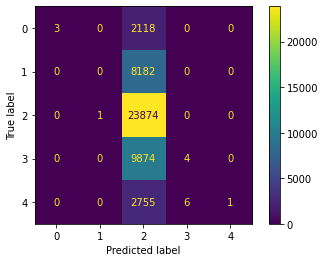

In [23]:
cf = metrics.confusion_matrix(y_test, predRF)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [0, 1, 2, 3, 4])

cm_display.plot()
plt.show()

#KNN

In [33]:
#Knn
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X, y_train)
predKNN = neigh.predict(X_test_transformed)
print("Accuracy: ", metrics.accuracy_score(y_test, predKNN))

Accuracy:  0.6095091631423811


In [36]:
print(classification_report(y_test, predKNN, digits = 4))

              precision    recall  f1-score   support

           0     0.4787    0.3013    0.3698      2121
           1     0.5055    0.3599    0.4205      8182
           2     0.6412    0.8752    0.7401     23875
           3     0.5701    0.3467    0.4312      9878
           4     0.5957    0.2288    0.3306      2762

    accuracy                         0.6095     46818
   macro avg     0.5582    0.4224    0.4584     46818
weighted avg     0.5924    0.6095    0.5782     46818



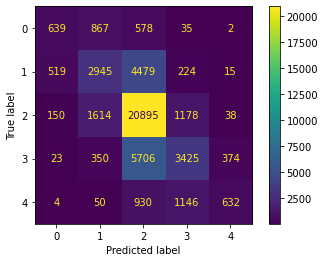

In [35]:
cf = metrics.confusion_matrix(y_test, predKNN)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [0, 1, 2, 3, 4])

cm_display.plot()
plt.show()

#Neural Network

In [37]:
#train
tokenizer = Tokenizer(num_words = 13205)
tokenizer.fit_on_texts(list(X_train))
sequences = tokenizer.texts_to_sequences(X_train)
X_train=pad_sequences(sequences, maxlen=28)
#test
tokenizer = Tokenizer(num_words = 13205)
tokenizer.fit_on_texts(list(X_test))
sequences = tokenizer.texts_to_sequences(X_test)
X_test=pad_sequences(sequences, maxlen=28)

In [38]:
model = Sequential() 
model.add(Embedding(13205, 300, input_length=28)) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 300)           3961500   
                                                                 
 dense (Dense)               (None, 28, 128)           38528     
                                                                 
 dropout (Dropout)           (None, 28, 128)           0         
                                                                 
 flatten (Flatten)           (None, 3584)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 17925     
                                                                 
Total params: 4,017,953
Trainable params: 4,017,953
Non-trainable params: 0
_________________________________________________________________


In [39]:
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=16)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:5583: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits, "Softmax", "sparse_categorical_crossentropy"


5463/5463 [==============================] - 34s 6ms/step - loss: 1.0265 - accuracy: 0.5913 - val_loss: 0.9363 - val_accuracy: 0.6258
Epoch 2/10
5463/5463 [==============================] - 28s 5ms/step - loss: 0.8558 - accuracy: 0.6606 - val_loss: 0.9371 - val_accuracy: 0.6266
Epoch 3/10
5463/5463 [==============================] - 28s 5ms/step - loss: 0.7851 - accuracy: 0.6912 - val_loss: 0.9580 - val_accuracy: 0.6330
Epoch 4/10
5463/5463 [==============================] - 28s 5ms/step - loss: 0.7403 - accuracy: 0.7087 - val_loss: 0.9991 - val_accuracy: 0.6261
Epoch 5/10
5463/5463 [==============================] - 29s 5ms/step - loss: 0.7118 - accuracy: 0.7196 - val_loss: 1.0340 - val_accuracy: 0.6293
Epoch 6/10
5463/5463 [==============================] - 28s 5ms/step - loss: 0.6951 - accuracy: 0.7281 - val_loss: 1.0657 - val_accuracy: 0.6307
Epoch 7/10
5463/5463 [==============================] - 28s 5ms/step - loss: 0.6794 - accuracy: 0.7334 - val_loss: 1.0906 - val_accuracy: 0.6

[]

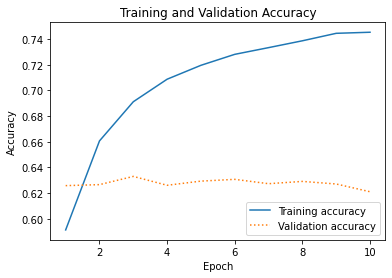

In [40]:
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [44]:
y_pred = model.predict(X_test)
predANN = np.argmax(y_pred, axis=1)
predANN = predANN.tolist()

1464/1464 [==============================] - 3s 2ms/step


In [45]:
print(classification_report(y_test, predANN, digits = 4))

              precision    recall  f1-score   support

           0     0.0748    0.0490    0.0592      2121
           1     0.2099    0.1705    0.1881      8182
           2     0.5795    0.6576    0.6161     23875
           3     0.2378    0.2380    0.2379      9878
           4     0.0960    0.0626    0.0758      2762

    accuracy                         0.4213     46818
   macro avg     0.2396    0.2356    0.2354     46818
weighted avg     0.3914    0.4213    0.4044     46818



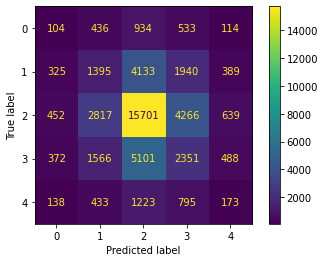

In [46]:
cf = metrics.confusion_matrix(y_test, predANN)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [0, 1, 2, 3, 4])

cm_display.plot()
plt.show()

#Transformers

In [47]:
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


In [50]:
df = ml.copy()
df2 = pd.DataFrame()
df2['text'] = df['Phrase']
df2['label'] = df['Sentiment']
df2.head()

train, test = train_test_split(df2 , test_size=0.2)
train, val= train_test_split(train, test_size= 0.1)

In [51]:
ds = DatasetDict()
ds_test = DatasetDict()
tds = Dataset.from_pandas(train)
vds = Dataset.from_pandas(val)
testds = Dataset.from_pandas(test)
ds['train'] = tds
ds['val'] = vds
ds_test['test'] = testds 
print(ds)

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 112363
    })
    val: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 12485
    })
})


In [52]:
def preprocess_function(examples):
  return tokenizer(examples["text"], truncation=True)

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [53]:
tok = ds.map(preprocess_function, batched=True)

  0%|          | 0/113 [00:00<?, ?ba/s]

  0%|          | 0/13 [00:00<?, ?ba/s]

In [54]:
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=5)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'classifier

In [55]:
training_args = TrainingArguments(
     "NLP2122_FranciosoDonato",
     learning_rate=2e-5,
     per_device_train_batch_size=16,
     per_device_eval_batch_size=16,
     gradient_accumulation_steps = 1,
     num_train_epochs=5,
     weight_decay=0.01,
     save_strategy = "epoch",
     push_to_hub=True,
 )

trainer = Trainer(
     model=model,
     args=training_args,
     train_dataset=tok["train"],
     eval_dataset=tok["val"],
     tokenizer=tokenizer,
 )

trainer.train()

Cloning https://huggingface.co/DonatoFrancioso/NLP2122_FranciosoDonato into local empty directory.
The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 112363
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 35115


Step,Training Loss
500,0.998000
1000,0.878000
1500,0.851700
2000,0.844600
2500,0.814900
3000,0.792500
3500,0.807500
4000,0.789400
4500,0.794000
5000,0.768600


Saving model checkpoint to NLP2122_FranciosoDonato/checkpoint-7023
Configuration saved in NLP2122_FranciosoDonato/checkpoint-7023/config.json
Model weights saved in NLP2122_FranciosoDonato/checkpoint-7023/pytorch_model.bin
tokenizer config file saved in NLP2122_FranciosoDonato/checkpoint-7023/tokenizer_config.json
Special tokens file saved in NLP2122_FranciosoDonato/checkpoint-7023/special_tokens_map.json
tokenizer config file saved in NLP2122_FranciosoDonato/tokenizer_config.json
Special tokens file saved in NLP2122_FranciosoDonato/special_tokens_map.json
Saving model checkpoint to NLP2122_FranciosoDonato/checkpoint-14046
Configuration saved in NLP2122_FranciosoDonato/checkpoint-14046/config.json
Model weights saved in NLP2122_FranciosoDonato/checkpoint-14046/pytorch_model.bin
tokenizer config file saved in NLP2122_FranciosoDonato/checkpoint-14046/tokenizer_config.json
Special tokens file saved in NLP2122_FranciosoDonato/checkpoint-14046/special_tokens_map.json
Saving model checkpoint

TrainOutput(global_step=35115, training_loss=0.6003143876532145, metrics={'train_runtime': 2439.9789, 'train_samples_per_second': 230.254, 'train_steps_per_second': 14.392, 'total_flos': 4553711609614140.0, 'train_loss': 0.6003143876532145, 'epoch': 5.0})

In [56]:
trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 12485
  Batch size = 16


{'eval_loss': 0.8884857892990112,
 'eval_runtime': 12.4394,
 'eval_samples_per_second': 1003.662,
 'eval_steps_per_second': 62.784,
 'epoch': 5.0}

In [57]:
tok_test = ds_test.map(preprocess_function, batched=True)

  0%|          | 0/32 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 31212
  Batch size = 16


              precision    recall  f1-score   support

           0     0.5052    0.4935    0.4993      1390
           1     0.5800    0.6037    0.5917      5461
           2     0.7821    0.7828    0.7825     16019
           3     0.6036    0.5784    0.5907      6502
           4     0.5564    0.5761    0.5661      1840

    accuracy                         0.6838     31212
   macro avg     0.6055    0.6069    0.6060     31212
weighted avg     0.6839    0.6838    0.6838     31212



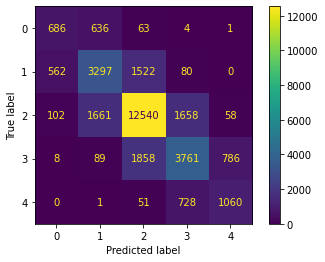

In [58]:
pred, lab, met = trainer.predict(tok_test['test'])
sol = np.argmax(pred, axis = 1)

print(classification_report(tok_test['test']['label'], sol, digits = 4))

confusion_matrix = metrics.confusion_matrix(tok_test['test']['label'], sol)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3, 4])

cm_display.plot()
plt.show()

In [59]:
trainer.push_to_hub()

Saving model checkpoint to NLP2122_FranciosoDonato
Configuration saved in NLP2122_FranciosoDonato/config.json
Model weights saved in NLP2122_FranciosoDonato/pytorch_model.bin
tokenizer config file saved in NLP2122_FranciosoDonato/tokenizer_config.json
Special tokens file saved in NLP2122_FranciosoDonato/special_tokens_map.json
Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file pytorch_model.bin:   0%|          | 3.34k/255M [00:00<?, ?B/s]

Upload file runs/Sep09_09-06-40_01db712a865d/events.out.tfevents.1662714412.01db712a865d.1103.0:  22%|##2     …

Upload file runs/Sep09_09-06-40_01db712a865d/events.out.tfevents.1662716864.01db712a865d.1103.2: 100%|########…

remote: Scanning LFS files for validity, may be slow...        
remote: LFS file scan complete.        
To https://huggingface.co/DonatoFrancioso/NLP2122_FranciosoDonato
   bb79ede..3f45502  main -> main

remote: LFS file scan complete.        
To https://huggingface.co/DonatoFrancioso/NLP2122_FranciosoDonato
   bb79ede..3f45502  main -> main

Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Text Classification', 'type': 'text-classification'}}
To https://huggingface.co/DonatoFrancioso/NLP2122_FranciosoDonato
   3f45502..bbe9aa1  main -> main

   3f45502..bbe9aa1  main -> main



'https://huggingface.co/DonatoFrancioso/NLP2122_FranciosoDonato/commit/3f45502d8266c4fbb7fc3701b9d7aae79e751ce5'

In [60]:
tokenizer = AutoTokenizer.from_pretrained("NLP2122_FranciosoDonato")
model = AutoModelForSequenceClassification.from_pretrained("NLP2122_FranciosoDonato")
model.eval()

Didn't find file NLP2122_FranciosoDonato/added_tokens.json. We won't load it.
loading file NLP2122_FranciosoDonato/vocab.txt
loading file NLP2122_FranciosoDonato/tokenizer.json
loading file None
loading file NLP2122_FranciosoDonato/special_tokens_map.json
loading file NLP2122_FranciosoDonato/tokenizer_config.json
loading configuration file NLP2122_FranciosoDonato/config.json
Model config DistilBertConfig {
  "_name_or_path": "NLP2122_FranciosoDonato",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [63]:
device_model = "cuda:0" if torch.cuda.is_available() else "cpu"
device_pipe = 0 if torch.cuda.is_available() else -1

pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, device=device_pipe)

In [64]:
dfTest = pd.read_csv("./test.tsv", sep = "\t")
X_phrase = dfTest['Phrase'].tolist()
X_id = dfTest['PhraseId'].tolist()
predizioni = pipe(X_phrase)

Disabling tokenizer parallelism, we're using DataLoader multithreading already


In [65]:
def change(predizioni):
  for i in range(0, len(predizioni)):
    for key, value in predizioni[i].items():
      if key == 'label':
        if value == 'LABEL_0':
          predizioni[i].update({key: 0})
        if value == 'LABEL_1':
          predizioni[i].update({key: 1})
        if value == 'LABEL_2':
          predizioni[i].update({key: 2})
        if value == 'LABEL_3':
          predizioni[i].update({key: 3})
        if value == 'LABEL_4':
          predizioni[i].update({key: 4})
  return predizioni

pred = change(predizioni)

In [66]:
pred[:10]

[{'label': 2, 'score': 0.8359150290489197},
 {'label': 2, 'score': 0.8321631550788879},
 {'label': 2, 'score': 0.9909407496452332},
 {'label': 2, 'score': 0.8359373807907104},
 {'label': 2, 'score': 0.8439257740974426},
 {'label': 2, 'score': 0.6588014960289001},
 {'label': 3, 'score': 0.5464649200439453},
 {'label': 2, 'score': 0.9765039086341858},
 {'label': 3, 'score': 0.5064350366592407},
 {'label': 2, 'score': 0.9900922179222107}]

In [67]:
output = [{'PhraseId': phrase_id, 'Sentiment': prediction['label']} for (phrase_id, prediction) in zip(X_id, predizioni)]


with open('/content/sample_data/Finalresults.csv', 'w', newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, ['PhraseId', 'Sentiment'])
    dict_writer.writeheader()
    dict_writer.writerows(output)